In [3]:
#Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AR

In [41]:
#Análise dos dados
df = pd.read_csv('canoas4.csv', header=0, index_col=0)
df

,AverageTemperatureCelsius
year,
1832,23.173
1833,23.543
1834,22.296
1835,23.802
1836,23.267
...,...
2009,22.910
2010,24.374
2011,25.493


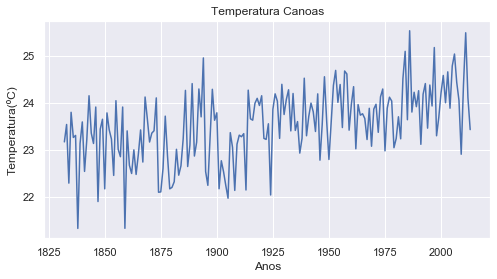

In [58]:
#Plot do gráfico
def plot_temp(df):
    fig, ax = plt.subplots(figsize=(8,4))
    plt.title("Temperatura Canoas")
    plt.xlabel('Anos')
    plt.ylabel('Temperatura(ºC)') 
    ax.plot(df.index, df)
    plt.savefig('canoastemp.png') 
plot_temp(df)

In [61]:
#Análise de Estacionaridade
X = df.values
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=23.148197, mean2=23.901418
variance1=0.520787, variance2=0.379810


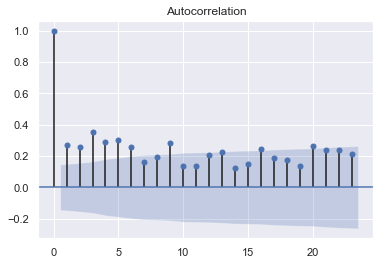

In [7]:
#Análise da ACF
plot_acf(df)
plt.show()

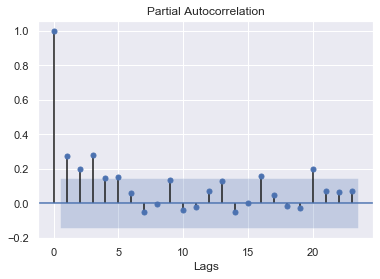

In [60]:
#Análise da PACF
plot_pacf(df)
plt.xlabel('Lags')
plt.savefig('pacf.png')
plt.show()

In [22]:
#Definição do espaço de treino
train_size = int(len(df) * 177 / 182)
train_size

177

In [23]:
#Aplicação do espaço de treino para os gráficos de treino e teste
train_set = df[:train_size]
test_set = df[train_size:]

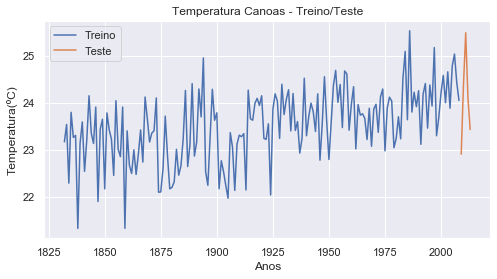

In [57]:
#Plot dos gráficos de treino e teste
def plot_train(train_set):
    fig, ax = plt.subplots(figsize=(8,4))
    plt.title("Temperatura Canoas - Treino/Teste")
    plt.xlabel('Anos')
    plt.ylabel('Temperatura(ºC)') 
    ax.plot(train_set.index, train_set, label = 'Treino')
    ax.plot(test_set.index, test_set, label = 'Teste')
    plt.legend()
    plt.savefig('canoastemptest.png')
plot_train(train_set)


In [25]:
#Implementação do Modelo Auto Regressivo(AR)
ar_2 = AR(train_set, freq=None).fit(2)
ar_2.params

C:\Users\erhon\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)
C:\

const                           13.262211
L1.AverageTemperatureCelsius     0.207417
L2.AverageTemperatureCelsius     0.228629
dtype: float64

In [26]:
#Algorítmo para estabelecer previsões com base nos parametros obtidos
previsoes = ar_2.params[0] + test_set.shift(1) * ar_2.params[1] + test_set.shift(2) * ar_2.params[2]


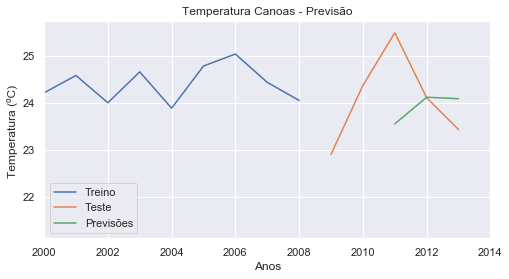

In [59]:
#Plot do gráfico de previsões
def plot_prev(previsoes):
    fig, ax = plt.subplots(figsize=(8,4))
    plt.title("Temperatura Canoas - Previsão")
    plt.xlabel('Anos')
    plt.ylabel('Temperatura (ºC) ') 
    ax.set(xlim=(2000, 2014))
    ax.plot(train_set.index, train_set, label='Treino')
    ax.plot(test_set.index, test_set, label = 'Teste')
    ax.plot(previsoes.index, previsoes, label = 'Previsões')
    plt . legend ()
    plt.savefig('canoastempres.png')
plot_prev(previsoes)